In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta   #initialize the learning rate (eta)
        self.n_iter = n_iter  #intialize the number of epochs we want to run the algorithm for

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.asarray([1, 1, -0.5])             # create our weight vector
        self.errors_ = []                     
        iter_count = 0
        for i in range(self.n_iter):          # for each pass  
            errors = 0                        # error counter
            for xi, target in zip(X, y):      # for each value in the training data and target data
                iter_count = iter_count + 1
                prediction = self.predict(xi) # run the learning function
                update = self.eta * (target - prediction)
                self.w_[1:] += update * xi    # scale the error_update in terms of the training data
                self.w_[0] += update          # add the scaled error to the weight vector
                errors += int(update != 0.0)  # update the error counter
            self.errors_.append(errors)       # record the number of errors into the error list
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]  # return the dot product of a training data entry with the weights

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # return a prediction of -1 or 1 depending on a positive or negative dot product



In [3]:
x = [0,1,1,0]
y = [0,0,1,1]
XOR = [0,1,0,1]
NOR = [1,0,0,0]
NAND = [1,1,0,1]
df = pd.DataFrame(
    {'x': x,
     'y': y,
     'XOR': XOR,
     'NOR':NOR,
     'NAND':NAND
    })
df

,x,y,XOR,NOR,NAND
0,0,0,0,1,1
1,1,0,1,0,1
2,1,1,0,0,0
3,0,1,1,0,1


In [4]:
def variables_generator(x,y,ppns,weights):
    for i in range(1,6):
        ppn = Perceptron(eta=0.1, n_iter=i)
        ppn.fit(x, y)
        weight = ppn.w_
        #weight = weight.tolist()
        ppns.append(ppn)
        weights.append(weight)
    return [ppns,weights]

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)



In [6]:
def demonstrate_Perceptron(x,y):
    weights = []
    ppns = []
    classifiers_weights = variables_generator(x,y,ppns,weights) 
    #plotting
    for i in range(5):
        plot_decision_regions(X= x, y=y, classifier = classifiers_weights[0][i])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='upper left')
        plt.tight_layout()
        title = 'Iteration = {iteration}, weight= {weight}'.format(iteration = i+1, weight = classifiers_weights[1][i])
        plt.title(title)
        plt.show()  
    

#### Use XOR as label

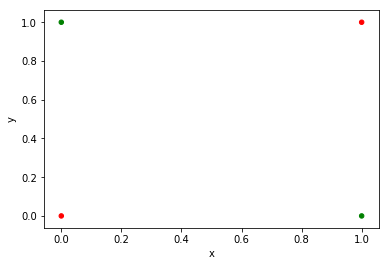

In [7]:
colors = np.where(df['XOR'] == True , 'g', 'r')
# plotting + line 
df.plot(kind='scatter', x='x', y='y',c=colors )
plt.show()

#### Start with W = (1, 1, -0.5) and run Perceptron algorithm on these 4 points for 5 iterations
- (1)Generate 5 plots of your line
- (2)On these plots, write the weights in the legend

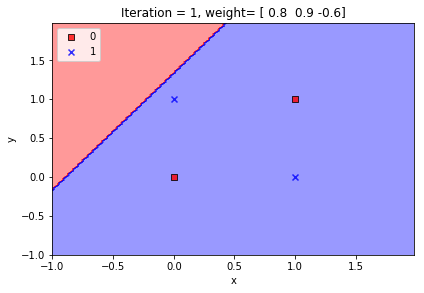

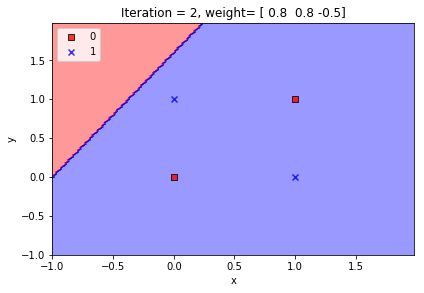

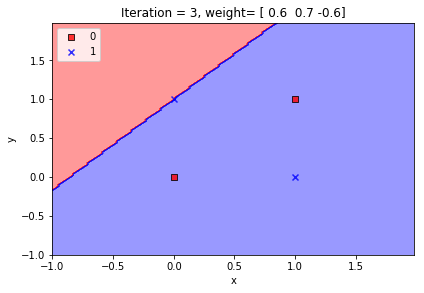

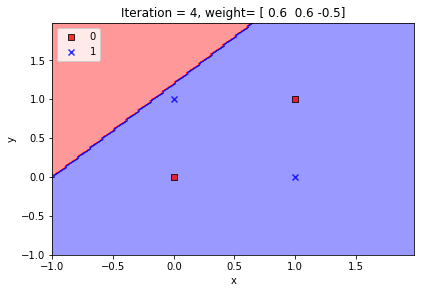

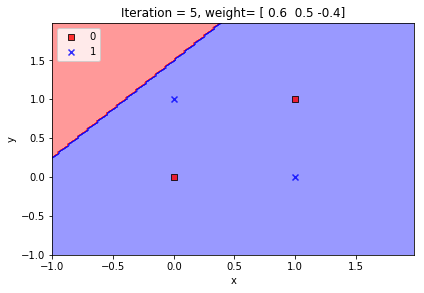

In [8]:
# extract coordinates (x,y)
X = df.iloc[0:4, [0, 1]].values

# select labels
y = df.iloc[0:4, 2]
y = np.asarray(y)

# 
demonstrate_Perceptron(X,y)

#### Use NOR as label

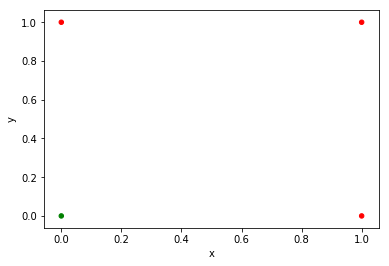

In [9]:
colors = np.where(df['NOR'] == True , 'g', 'r')
# plotting + line 
df.plot(kind='scatter', x='x', y='y',c=colors )
plt.show()

#### Start with W = (1, 1, -0.5) and run Perceptron algorithm on these 4 points for 5 iterations
- (1)Generate 5 plots of your line
- (2)On these plots, write the weights in the legend

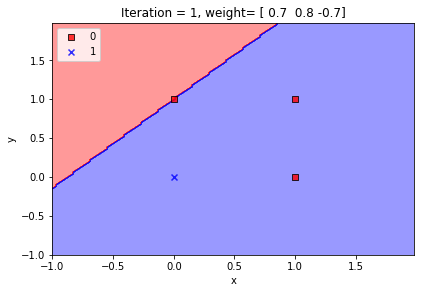

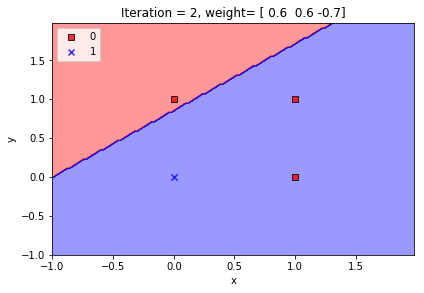

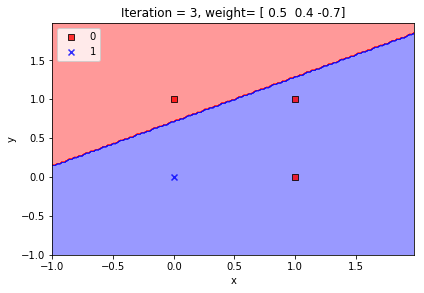

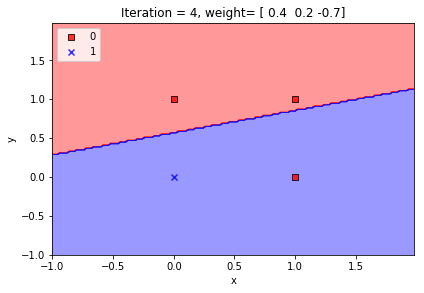

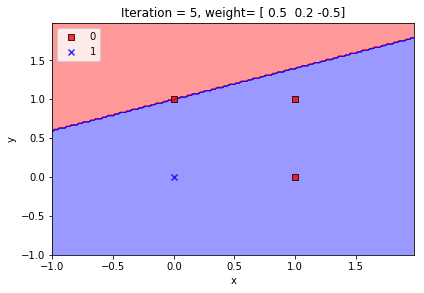

In [10]:
# extract coordinates (x,y)
X = df.iloc[0:4, [0, 1]].values

# select labels
y = df.iloc[0:4, 3]
y = np.asarray(y)

# 
demonstrate_Perceptron(X,y)

#### Use NAND as label

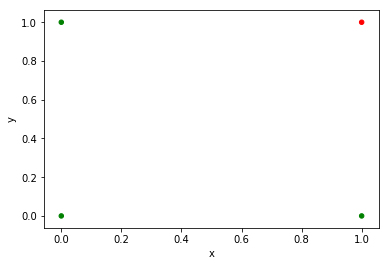

In [11]:
colors = np.where(df['NAND'] == True , 'g', 'r')
# plotting + line 
df.plot(kind='scatter', x='x', y='y',c=colors )
plt.show()

#### Start with W = (1, 1, -0.5) and run Perceptron algorithm on these 4 points for 5 iterations
- (1)Generate 5 plots of your line
- (2)On these plots, write the weights in the legend

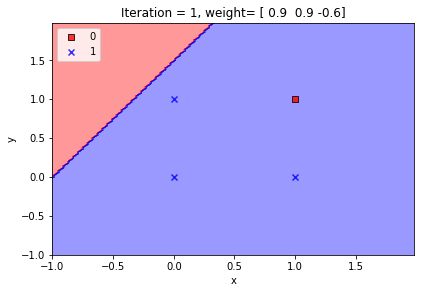

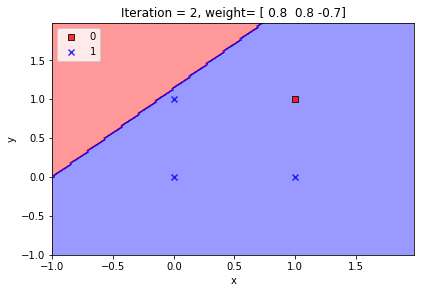

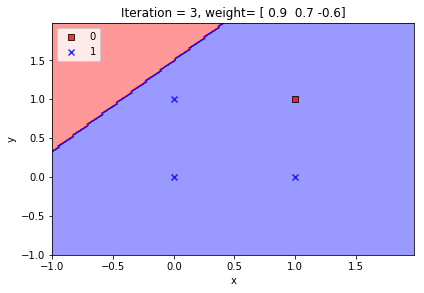

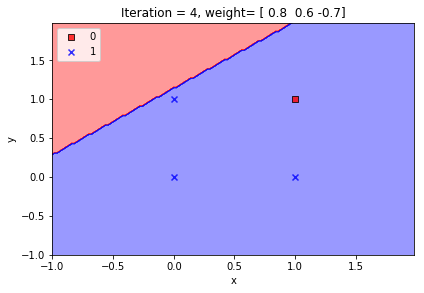

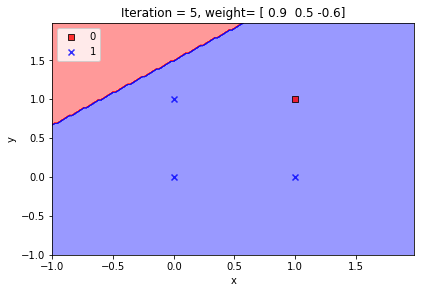

In [12]:
# extract coordinates (x,y)
X = df.iloc[0:4, [0, 1]].values

# select labels
y = df.iloc[0:4, 4]
y = np.asarray(y)

# 
demonstrate_Perceptron(X,y)